In [348]:
#common libraries

import numpy as np
import pandas as pd 

#dataviz libraries 

import matplotlib.pyplot as plt
import seaborn as sns


#models 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

#
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, minmax_scale, MinMaxScaler

#metrics 
from sklearn.metrics import accuracy_score ,balanced_accuracy_score, make_scorer, confusion_matrix, f1_score, classification_report, roc_auc_score

#Explanability 

import shap



from sksurv.ensemble import RandomSurvivalForest




In [279]:
df = pd.read_csv('Churn_Modelling.csv')

#                                                                        Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


df.head()

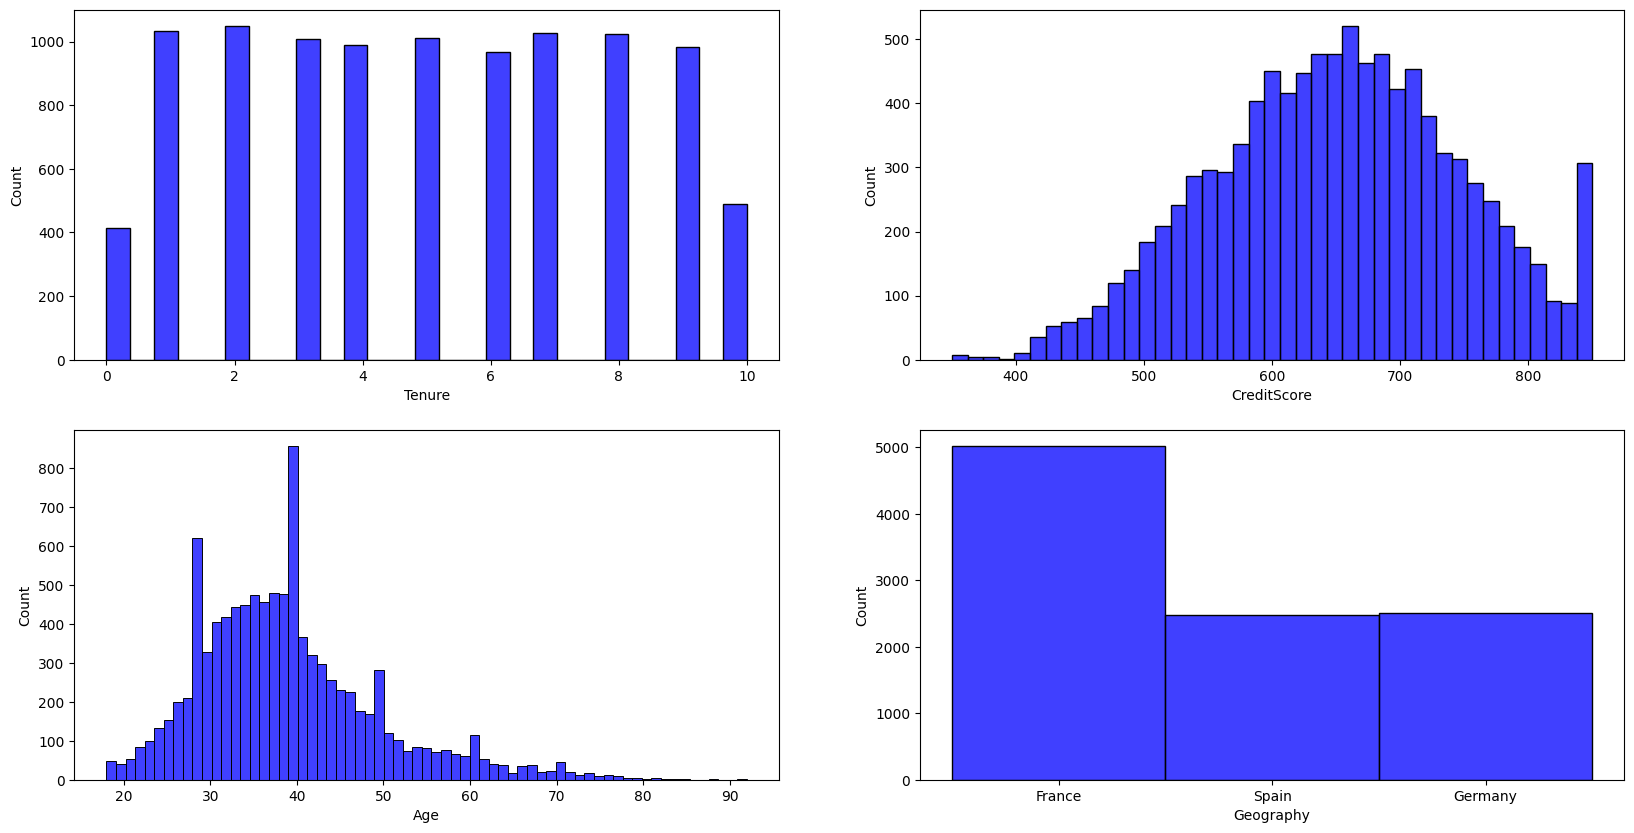

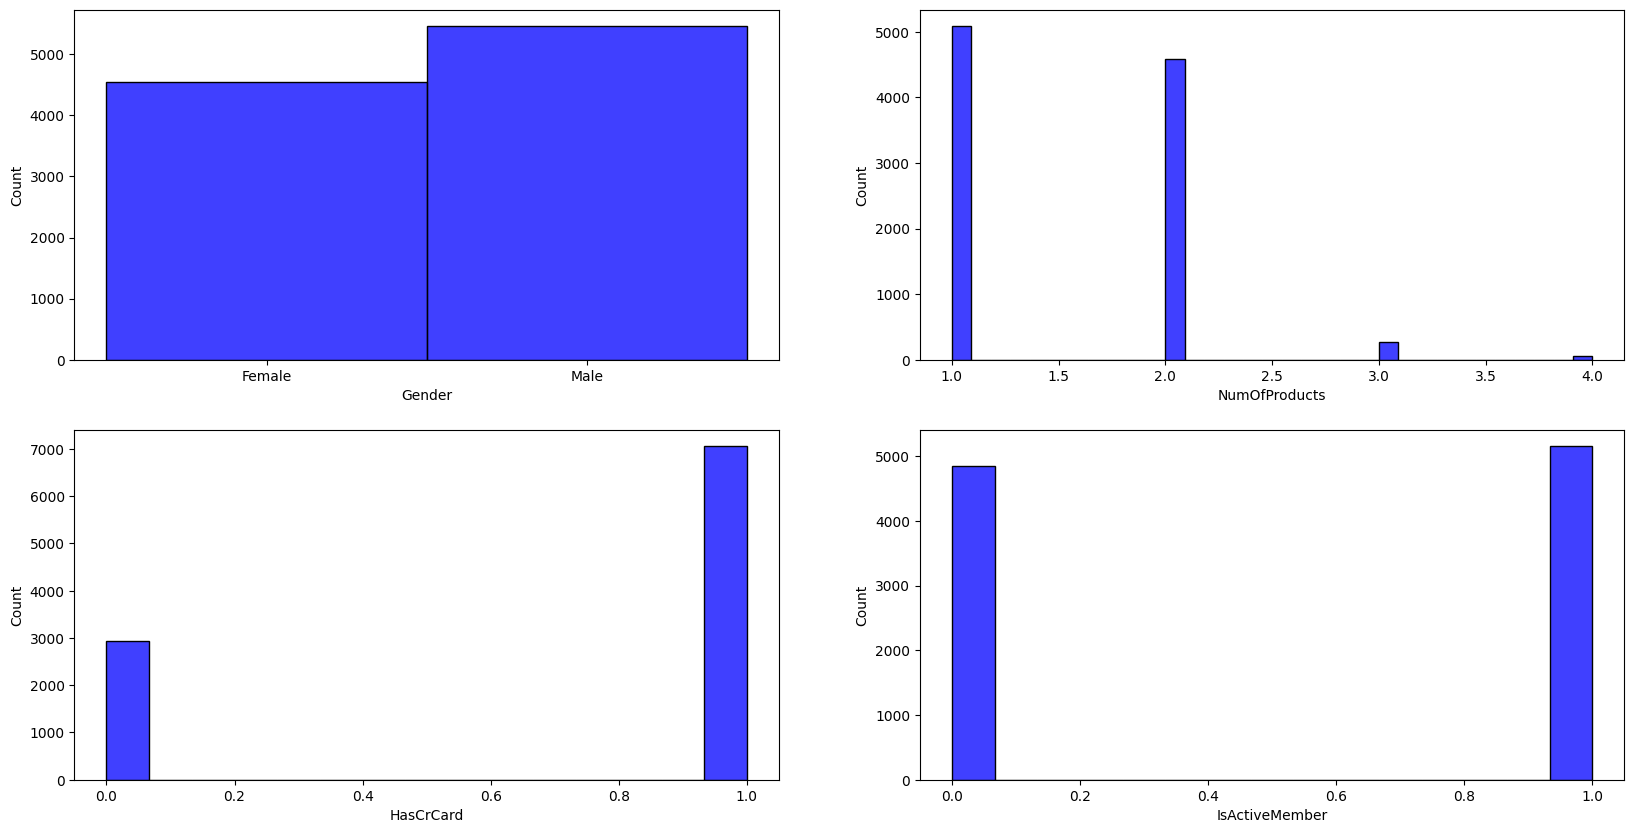

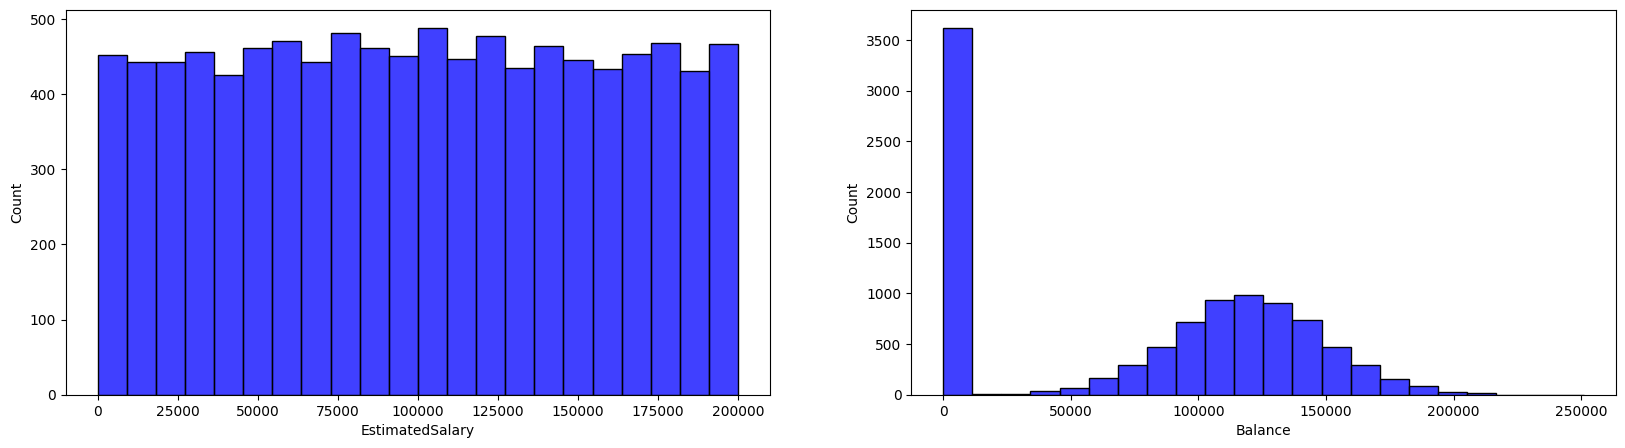

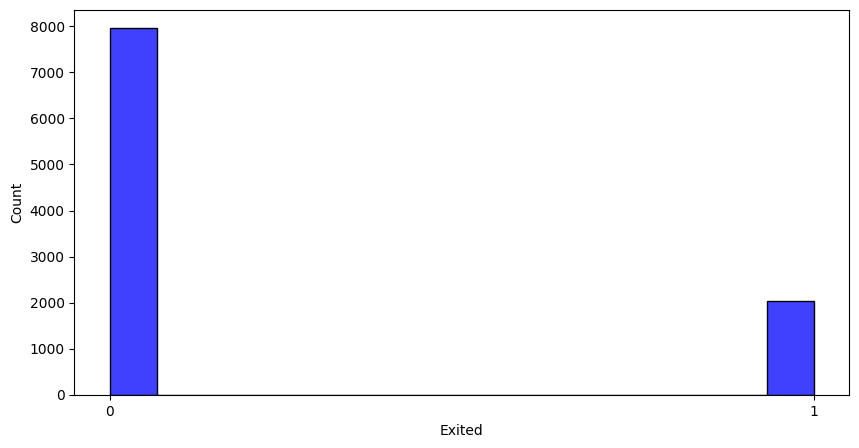

In [8]:
fig, ax = plt.subplots(2,2, figsize=(20,10))



sns.histplot(df['Tenure'], color='blue', ax= ax[0,0])
sns.histplot(df['CreditScore'], color='blue', ax= ax[0,1])
sns.histplot(df['Age'], color='blue', ax= ax[1,0])
sns.histplot(df['Geography'], color='blue', ax= ax[1,1])


fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.histplot(df['Gender'], color='blue', ax= ax[0,0])
sns.histplot(df['NumOfProducts'], color='blue', ax= ax[0,1])
sns.histplot(df['HasCrCard'], color='blue', ax= ax[1,0])
sns.histplot(df['IsActiveMember'], color='blue', ax= ax[1,1])


fig, ax = plt.subplots(1,2, figsize=(20,5))

sns.histplot(df['EstimatedSalary'], color='blue', ax= ax[0])

sns.histplot(df['Balance'], color='blue', ax= ax[1])

fig, ax = plt.subplots(1,1, figsize=(10,5))

sns.histplot(df['Exited'], color='blue', ax= ax)
ax.set_xticks([0,1])



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

<AxesSubplot: xlabel='Age', ylabel='Density'>

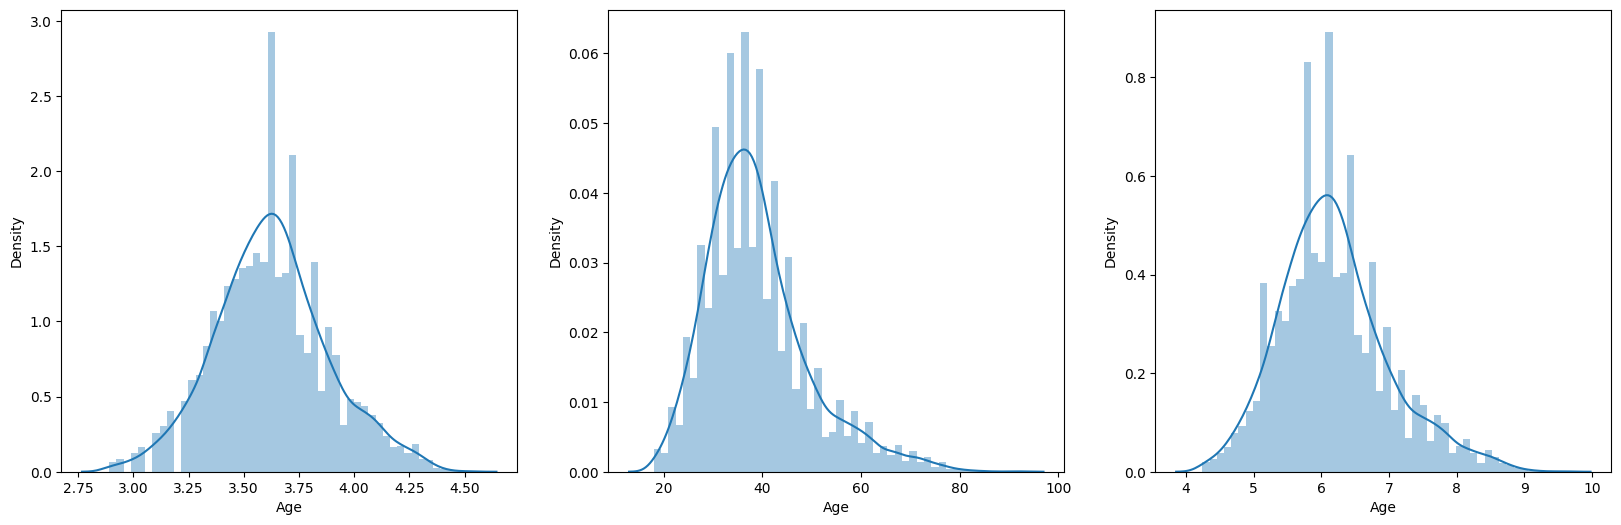

In [377]:

fig,ax = plt.subplots(1,3, figsize=(20,6))
sns.distplot(np.log(df['Age']), ax=ax[0])
sns.distplot(df['Age'],ax=ax[1])
sns.distplot(np.sqrt(df['Age']),ax=ax[2])

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Text(0.5, 1.0, 'Correlation Matrix')

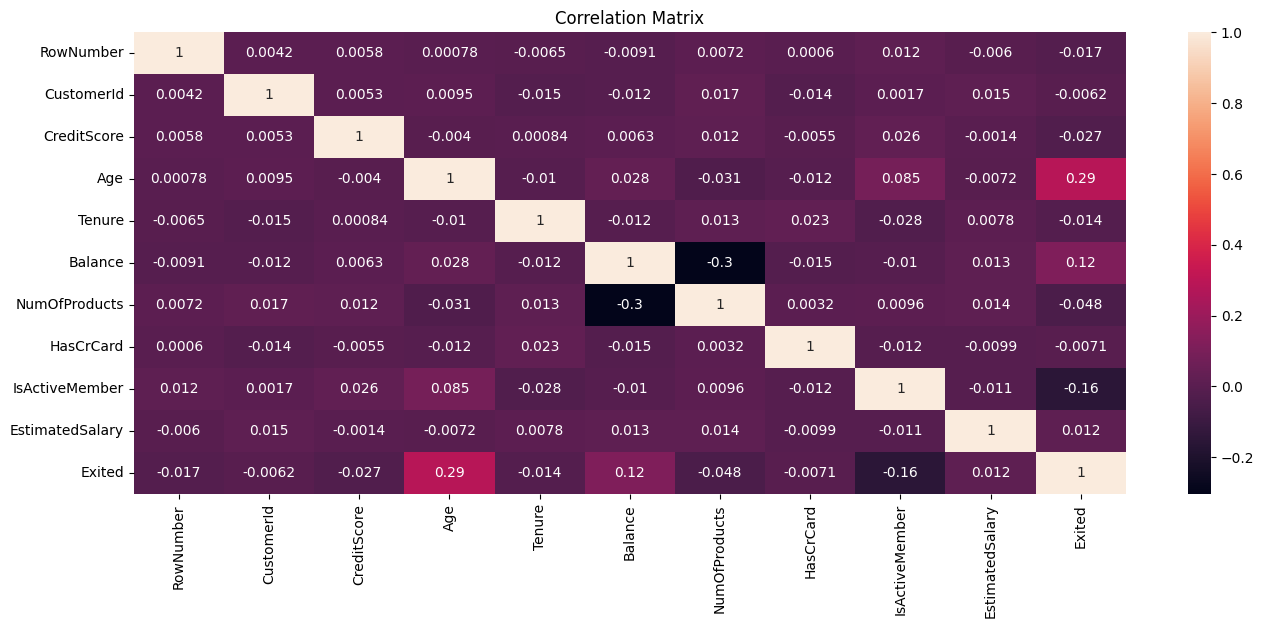

In [284]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')

In [292]:
#onehotencoding of gender and geography columns
df2= pd.get_dummies(df, columns=['Gender','Geography'])
df2=df2.drop(['Gender_Male'],axis=1) #due to correlation

In [293]:
df2

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,1,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0,1,0,0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0,1,0,0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,1,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,0,1,0


### Linear SVC

In [286]:
Y=df2.Exited
X=df2.drop(['Exited','Surname','RowNumber','CustomerId'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, shuffle=True)


In [122]:
preprocessor=make_column_transformer((MaxAbsScaler(), ['Age','CreditScore','Balance']), remainder='passthrough')

pipe = Pipeline([('transformer', preprocessor), ('svm', LinearSVC(max_iter=5000))])
parameters = {'svm__C': np.logspace(-8, 8, 17, base=20)}
svc_clf = GridSearchCV(pipe, parameters, cv=4, scoring ='f1')
svc_clf.fit(x_train, y_train)

Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to conve

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('maxabsscaler',
                                                                         MaxAbsScaler(),
                                                                         ['Age',
                                                                          'CreditScore',
                                                                          'Balance'])])),
                                       ('svm', LinearSVC(max_iter=5000))]),
             param_grid={'svm__C': array([3.90625e-11, 7.81250e-10, 1.56250e-08, 3.12500e-07, 6.25000e-06,
       1.25000e-04, 2.50000e-03, 5.00000e-02, 1.00000e+00, 2.00000e+01,
       4.00000e+02, 8.00000e+03, 1.60000e+05, 3.20000e+06, 6.40000e+07,
       1.28000e+09, 2.56000e+10])},
             scoring='f1')

In [123]:
y_pred = svc_clf.predict(x_test)
print('Returned hyperparameter: {}'.format(svc_clf.best_params_))
print('Best classification accuracy in train is: {}'.format(svc_clf.best_score_))
print('Classification accuracy on test is: {}'.format(f1_score(y_pred,y_test)))


print(confusion_matrix(y_pred,y_test))

Returned hyperparameter: {'svm__C': 1280000000.0}
Best classification accuracy in train is: 0.3194262850206911
Classification accuracy on test is: 0.3217477656405164
[[1155  277]
 [ 406  162]]


### Knn

In [117]:
preprocessor=make_column_transformer((MaxAbsScaler(), ['Age','CreditScore','Balance']), remainder='passthrough')

pipe = Pipeline([('transformer', preprocessor), ('knn', KNeighborsClassifier())])
parameters = {'knn__n_neighbors': [1, 2, 3, 4, 5]}
knn_clf = GridSearchCV(pipe, parameters, cv=4, scoring ='accuracy')
knn_clf.fit(x_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('maxabsscaler',
                                                                         MaxAbsScaler(),
                                                                         ['Age',
                                                                          'CreditScore',
                                                                          'Balance'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [119]:
y_pred = knn_clf.predict(x_test)
print('Returned hyperparameter: {}'.format(knn_clf.best_params_))
print('Best classification accuracy in train is: {}'.format(knn_clf.best_score_))
print('Classification accuracy on test is: {}'.format(f1_score(y_pred,y_test)))


print(confusion_matrix(y_pred,y_test))

Returned hyperparameter: {'knn__n_neighbors': 4}
Best classification accuracy in train is: 0.78375
Classification accuracy on test is: 0.0597609561752988
[[1513  424]
 [  48   15]]


### Logisitic regression

In [13]:
preprocessor=make_column_transformer((MaxAbsScaler(), ['Age','CreditScore','Balance']), remainder='passthrough')

pipe = Pipeline([('transformer', preprocessor), ('logreg', LogisticRegression(max_iter=10000, class_weight='Balanced'))])
parameters1 = {'logreg__C': np.logspace(-20, 20, 17, base=10)}
log_clf = GridSearchCV(pipe, parameters1, cv=4, scoring ='f1')
log_clf.fit(x_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('maxabsscaler',
                                                                         MaxAbsScaler(),
                                                                         ['Age',
                                                                          'CreditScore',
                                                                          'Balance'])])),
                                       ('logreg',
                                        LogisticRegression(class_weight='Balanced',
                                                           max_iter=10000))]),
             param_grid={'logreg__C': array([1.00000000e-20, 3.16227766e-18, 1.00000000e-15, 3.16227766e-13,
       1.00000000e-10, 3.16227766e-08, 1.00000000e-05, 3.16227766e-03,
       1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10, 3.16227766e+12, 1.00000000e+15, 3.16227766e+17,
       1.00000000e+20])},
             scoring='f1')

In [14]:
y_pred = log_clf.predict(x_test)
print('Returned hyperparameter: {}'.format(log_clf.best_params_))
print('Best classification accuracy in train is: {}'.format(log_clf.best_score_))
print('Classification accuracy on test is: {}'.format(f1_score(y_pred,y_test)))

Returned hyperparameter: {'logreg__C': 1e-20}
Best classification accuracy in train is: 0.0
Classification accuracy on test is: 0.0


In [15]:
print(confusion_matrix(y_pred, y_test))

[[1600  400]
 [   0    0]]


### RF

In [16]:
preprocessor=make_column_transformer((MaxAbsScaler(), ['Age','CreditScore','Balance']), remainder='passthrough')

pipe2 = Pipeline([('transformer', preprocessor), ('RF', RandomForestClassifier())])
parameters2 = {'RF__n_estimators':[200,300,400,500],
               'RF__criterion':['gini','entropy'],
               'RF__class_weight':['balanced', 'balanced_subsample'],
               'RF__max_depth' : range(1,5)
               #'RF__min_samples_split':range(2,10),
               #'RF__min_samples_leaf':range(1,5)
              } # defining parameter space
rnd_clf = GridSearchCV(pipe2, parameters2, cv=3, scoring ='f1')
rnd_clf.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('maxabsscaler',
                                                                         MaxAbsScaler(),
                                                                         ['Age',
                                                                          'CreditScore',
                                                                          'Balance'])])),
                                       ('RF', RandomForestClassifier())]),
             param_grid={'RF__class_weight': ['balanced', 'balanced_subsample'],
                         'RF__criterion': ['gini', 'entropy'],
                         'RF__max_depth': range(1, 5),
                         'RF__n_estimators': [200, 300, 400, 500]},
             scoring='f1')

In [17]:
print('Returned hyperparameter: {}'.format(rnd_clf.best_params_))
print('Best classification accuracy in train is: {}'.format(rnd_clf.best_score_))
print('Classification accuracy on test is: {}'.format(f1_score(rnd_clf.predict(x_test),y_test)))

Returned hyperparameter: {'RF__class_weight': 'balanced', 'RF__criterion': 'gini', 'RF__max_depth': 4, 'RF__n_estimators': 200}
Best classification accuracy in train is: 0.5797588021329132
Classification accuracy on test is: 0.5810162991371045


In [18]:
print(confusion_matrix(rnd_clf.predict(x_test),y_test))

print(classification_report(rnd_clf.predict(x_test),y_test))


[[1260   97]
 [ 340  303]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1357
           1       0.76      0.47      0.58       643

    accuracy                           0.78      2000
   macro avg       0.77      0.70      0.72      2000
weighted avg       0.78      0.78      0.77      2000



<AxesSubplot: >

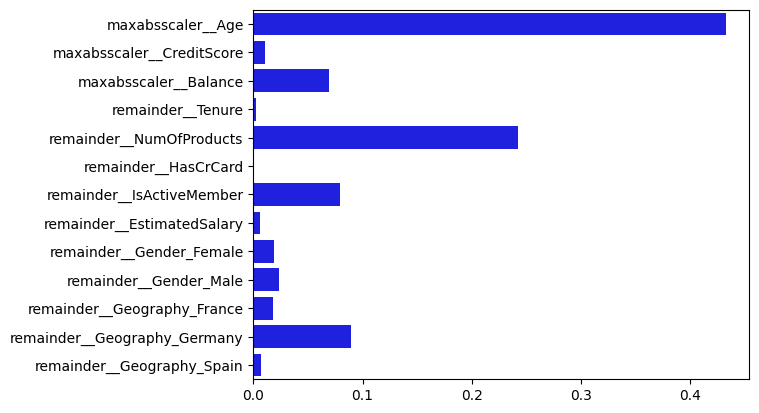

In [20]:
sns.barplot(y=rnd_clf.best_estimator_[0].get_feature_names_out(),x=rnd_clf.best_estimator_[1].feature_importances_, color='blue', orient='h')


### XGBoost

In [294]:
df3 = df2 


In [295]:
Y = df3.Exited
X=df3.drop(['Exited','Surname','RowNumber','CustomerId'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

In [296]:
X=df3.drop(['Exited','Surname','RowNumber','CustomerId'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

preprocessor=make_column_transformer((MaxAbsScaler(), ['Age','CreditScore','Balance']), remainder='passthrough')

pipe4 = Pipeline([('transformer', preprocessor), ('XGB', XGBClassifier(scale_pos_weight=0.8))])
parameters = { 'XGB__max_depth':[1,2,3,4],
               'XGB__n_estimators':[200,300,400,500]     
               #'RF__class_weight':['balanced', 'balanced_subsample'],
               #'RF__min_samples_split':range(2,10),
               #'RF__min_samples_leaf':range(1,5)
              } # defining parameter space
xgb_clf = GridSearchCV(pipe4, parameters, cv=4, scoring ='f1')
xgb_clf.fit(x_train, y_train)


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('maxabsscaler',
                                                                         MaxAbsScaler(),
                                                                         ['Age',
                                                                          'CreditScore',
                                                                          'Balance'])])),
                                       ('XGB',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_ca...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'XGB__max_depth': [1, 2, 3, 4],
                         'XGB__n_estimators': [200, 300, 400, 500]},
             scoring='f1')

In [297]:
print(xgb_clf.best_params_)

print(f1_score(xgb_clf.predict(x_test),y_test))

print(confusion_matrix(xgb_clf.predict(x_test),y_test))

print(classification_report(xgb_clf.predict(x_test),y_test))

{'XGB__max_depth': 3, 'XGB__n_estimators': 300}
0.5850556438791734
[[1555  214]
 [  47  184]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1769
           1       0.46      0.80      0.59       231

    accuracy                           0.87      2000
   macro avg       0.72      0.84      0.75      2000
weighted avg       0.91      0.87      0.88      2000



<AxesSubplot: >

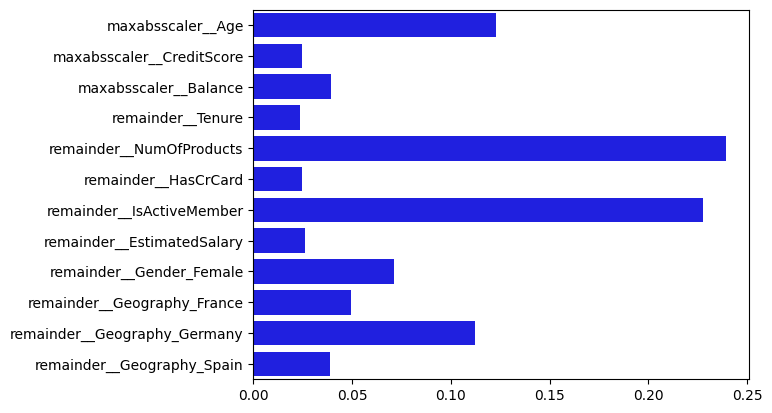

In [298]:
sns.barplot(y=xgb_clf.best_estimator_[0].get_feature_names_out(),x=xgb_clf.best_estimator_[1].feature_importances_, color='blue', orient='h')

In [299]:
df4 = df3

Drop des features moins importantes

In [323]:
Y=df4.Exited
X=df4.drop(['Exited','Surname','RowNumber','CustomerId','Tenure','CreditScore','HasCrCard','EstimatedSalary','Balance','Geography_France'],axis=1)

x_train2,x_test2,y_train2,y_test2=train_test_split(X,Y,test_size=0.2, shuffle=True)


preprocessor=make_column_transformer((MaxAbsScaler(), ['Age']), remainder='passthrough')

pipe5 = Pipeline([('transformer', preprocessor), ('XGB', XGBClassifier(booster='gbtree'))])
parameters = {'XGB__max_depth':[1,2,3,4,5],
              'XGB__n_estimators':[100,200,300,400,500],
               #'RF__criterion':['gini','entropy'],
               #'RF__class_weight':['balanced', 'balanced_subsample'],
               #'RF__min_samples_split':range(2,10),
               #'RF__min_samples_leaf':range(1,5)
              } # defining parameter space
xgb2_clf = GridSearchCV(pipe5, parameters, cv=4, scoring ='f1')
xgb2_clf.fit(x_train2, y_train2)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('maxabsscaler',
                                                                         MaxAbsScaler(),
                                                                         ['Age'])])),
                                       ('XGB',
                                        XGBClassifier(base_score=None,
                                                      booster='gbtree',
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'XGB__max_depth': [1, 2, 3, 4, 5],
                         'XGB__n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1')

In [324]:
print('Returned hyperparameter: {}'.format(xgb2_clf.best_params_))
print('Best classification accuracy in train is: {}'.format(xgb2_clf.best_score_))
print('Classification accuracy on test is: {}'.format(f1_score(xgb2_clf.predict(x_test2),y_test2)))

Returned hyperparameter: {'XGB__max_depth': 4, 'XGB__n_estimators': 100}
Best classification accuracy in train is: 0.5695591129308901
Classification accuracy on test is: 0.5974395448079659


In [325]:
print(confusion_matrix(xgb2_clf.predict(x_test2),y_test2))
print(classification_report(xgb2_clf.predict(x_test2),y_test2))

[[1507  211]
 [  72  210]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1718
           1       0.50      0.74      0.60       282

    accuracy                           0.86      2000
   macro avg       0.73      0.81      0.76      2000
weighted avg       0.89      0.86      0.87      2000



<AxesSubplot: >

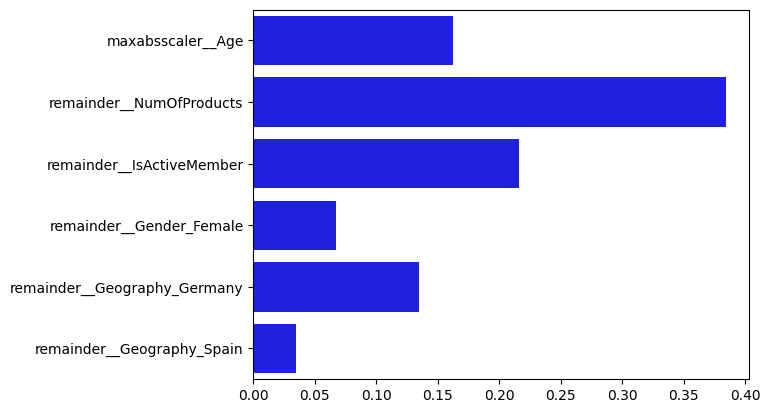

In [371]:
sns.barplot(y=xgb2_clf.best_estimator_[0].get_feature_names_out(),x=xgb2_clf.best_estimator_[1].feature_importances_, color='blue', orient='h')

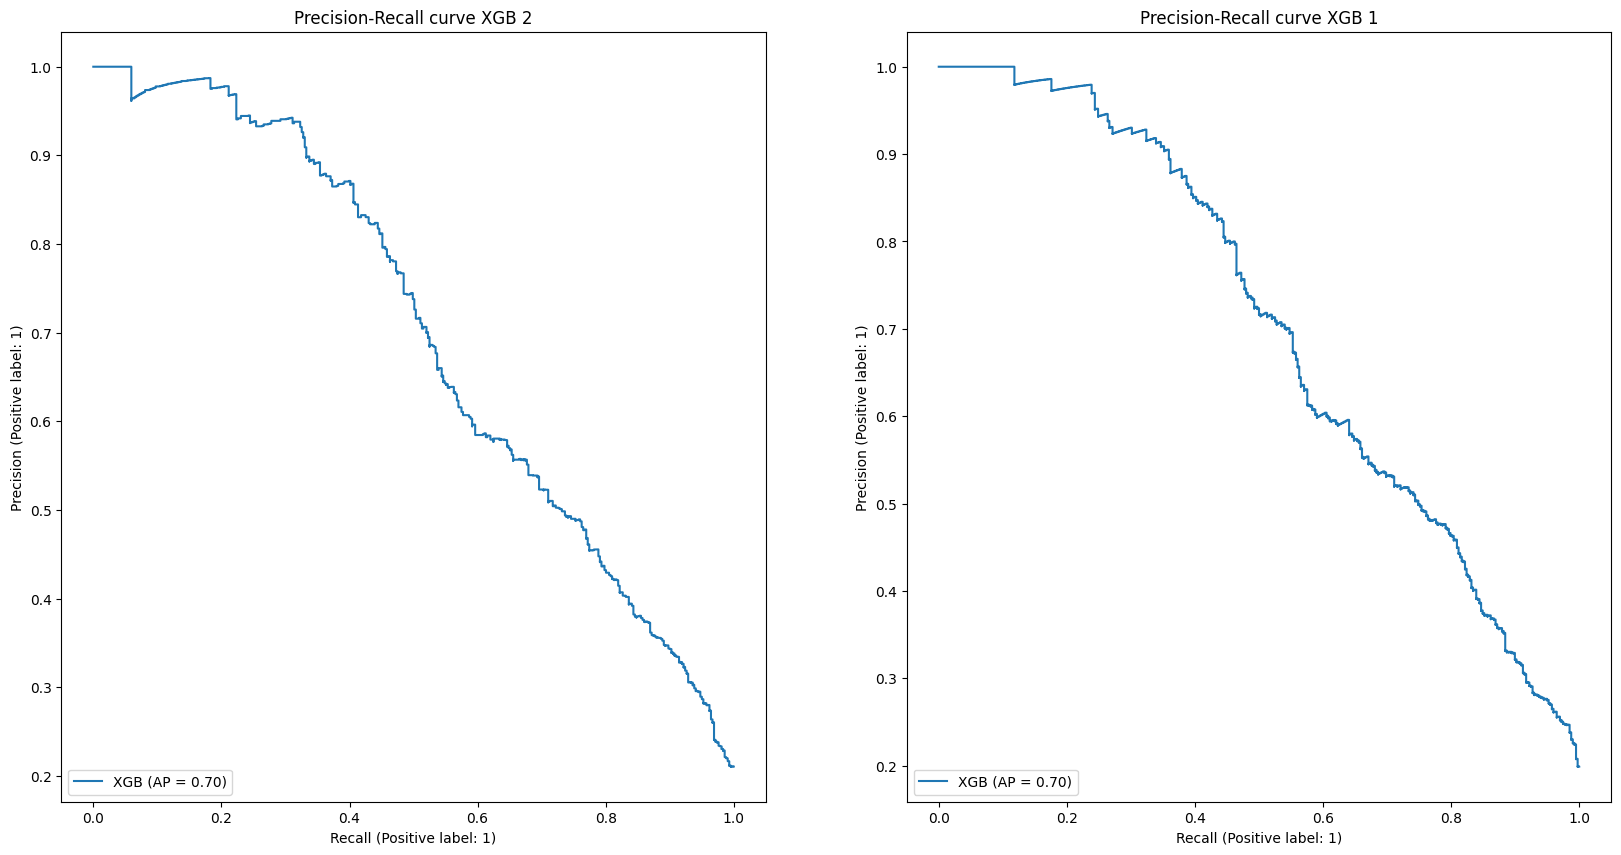

In [327]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(1,2, figsize=(20,10))

display = PrecisionRecallDisplay.from_estimator(
    xgb2_clf, x_test2, y_test2, name="XGB" , ax=ax[0]
)
_ = display.ax_.set_title("Precision-Recall curve XGB 2")


display = PrecisionRecallDisplay.from_estimator(
    xgb_clf, x_test, y_test, name="XGB" , ax=ax[1]
)
_ = display.ax_.set_title("Precision-Recall curve XGB 1")

Text(0.5, 1.0, 'Classification report xgb1')

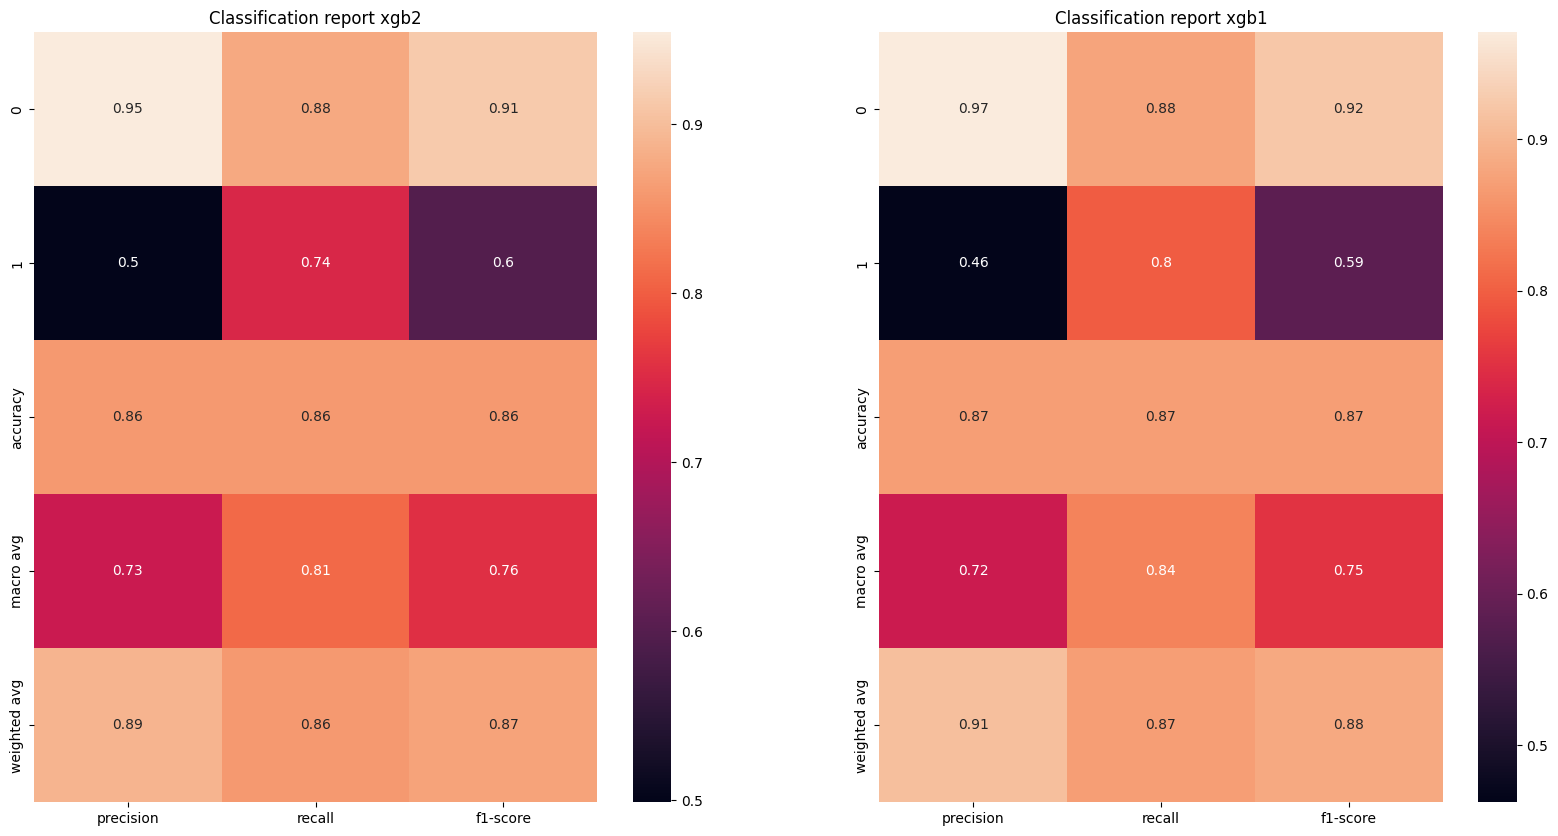

In [328]:
fig, ax = plt.subplots(1,2, figsize=(20,10))


sns.heatmap(pd.DataFrame(classification_report(xgb2_clf.predict(x_test2),y_test2,output_dict=True)).iloc[:-1, :].T, annot=True,ax=ax[0]).set_title('Classification report xgb2')


sns.heatmap(pd.DataFrame(classification_report(xgb_clf.predict(x_test),y_test,output_dict=True)).iloc[:-1, :].T, annot=True,ax=ax[1]).set_title('Classification report xgb1')


Text(0.5, 1.0, 'Matrice de confusion')

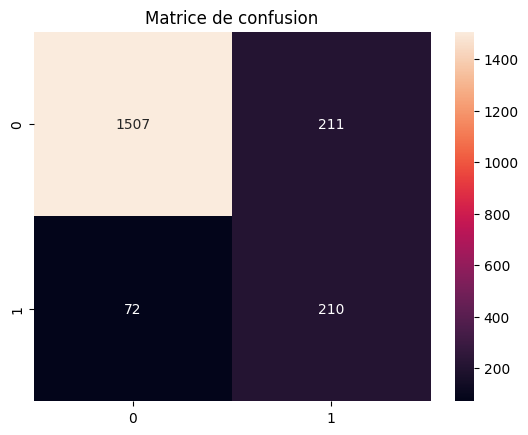

In [338]:
sns.heatmap(confusion_matrix(xgb2_clf.predict(x_test2),y_test2),fmt='.4g', annot=True).set_title('Matrice de confusion')

### new Loss ? 

In [50]:
def loss_new_score(y_true,y_pred,**kwargs):
    loss_new=[]
    y_true=list(y_true)
    y_pred = list(y_pred)
    for i in range(len(y_true)) :
        #predicted value of Y = its true value
        if (y_pred[i]==y_true[i]) :
            loss_new.append(1)
        #predicted value of Y != its true value, but the two still belong to the same classe
        elif ((y_true[i]==1) & (y_pred[i]==0)):
            loss_new.append(0)
        else : 
        #predicted value of Y != its true value, and the two belong to different classes
            loss_new.append(0.8)
    return np.sum(loss_new)


loss_new_scorer = make_scorer(loss_new_score,greater_is_better=True)

In [51]:
loss_new_score([1,1,0],[0,0,1])

0.8

In [53]:
Y=df4.Exited
X=df4.drop(['Exited','Surname','RowNumber','CustomerId','Gender_Male'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, shuffle=True)


preprocessor=make_column_transformer((StandardScaler(), ['Age','CreditScore','Balance']), remainder='passthrough')

pipe6 = Pipeline([('transformer', preprocessor), ('XGB', XGBClassifier(scale_pos_weight=0.8))])
parameters = {'XGB__max_depth':[1,2,3,4],
              'XGB__n_estimators':[100,200,300,400,500],
               #'RF__criterion':['gini','entropy'],
               #'RF__class_weight':['balanced', 'balanced_subsample'],
               #'RF__min_samples_split':range(2,10),
               #'RF__min_samples_leaf':range(1,5)
              } # defining parameter space
xgb3_clf = GridSearchCV(pipe6, parameters, cv=3, scoring =loss_new_scorer)
xgb3_clf.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'CreditScore',
                                                                          'Balance'])])),
                                       ('XGB',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enabl...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'XGB__max_depth': [1, 2, 3, 4],
                         'XGB__n_estimators': [100, 200, 300, 400, 500]},
             scoring=make_scorer(loss_new_score))

In [54]:
print('Returned hyperparameter: {}'.format(xgb3_clf.best_params_))
print('Best classification accuracy in train is: {}'.format(xgb3_clf.best_score_))
print('f1 score on test is: {}'.format(f1_score(xgb3_clf.predict(x_test),y_test)))

Returned hyperparameter: {'XGB__max_depth': 4, 'XGB__n_estimators': 300}
Best classification accuracy in train is: 2358.266666666667
f1 score on test is: 0.5784615384615385


In [55]:
print(confusion_matrix(xgb3_clf.predict(x_test),y_test))

print(classification_report(xgb3_clf.predict(x_test),y_test))

[[1538  199]
 [  75  188]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1737
           1       0.49      0.71      0.58       263

    accuracy                           0.86      2000
   macro avg       0.72      0.80      0.75      2000
weighted avg       0.89      0.86      0.87      2000



### Shap

In [339]:
shap.initjs()

In [340]:
x_sampled = x_train2.sample(100, random_state=10)
explainer = shap.TreeExplainer(xgb2_clf.best_estimator_[1])
shap_values = explainer.shap_values(x_sampled)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


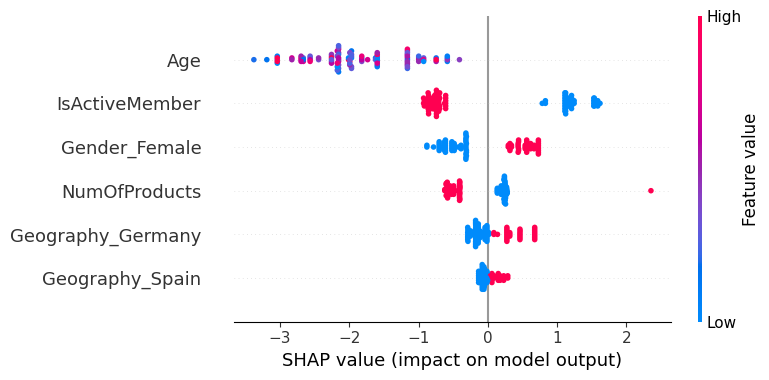

In [341]:
shap.summary_plot(shap_values, x_sampled)

In [370]:
xgb2_clf.best_estimator_[1].feature_importances_

array([0.16268878, 0.38422906, 0.21609494, 0.06739838, 0.1345524 ,
       0.03503642], dtype=float32)

In [112]:

Y=df4[['Exited','Tenure']]
X=df4.drop(['Exited','Surname','RowNumber','CustomerId','Gender_Male'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, shuffle=True)

preprocessor=make_column_transformer((MaxAbsScaler(), ['Age','Balance','CreditScore']), remainder='passthrough')

pipe6 = Pipeline([('transformer', preprocessor), ('RF', RandomSurvivalForest())])
parameters = {'RF__n_estimators':[200,300,400,500],
               'RF__max_depth' : range(1,5)
               #'RF__min_samples_split':range(2,10),
               #'RF__min_samples_leaf':range(1,5)
              } # defining parameter space
rnds_clf = GridSearchCV(pipe6, parameters, cv=3, scoring ='f1')
rnds_clf.fit(x_train, T =np.array([y_train.Tenure]) , y=np.array([y_train.Exited]))

ValueError: Found input variables with inconsistent numbers of samples: [8000, 1]

In [111]:
np.array([y_train.Exited])

array([[0, 0, 0, ..., 0, 0, 0]])

In [103]:
Y=df4[['Exited','Tenure']]

In [106]:
Y.index

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
Y=df4.Exited
X=df4.drop(['Exited','Surname','RowNumber','CustomerId','Gender_Male','Tenure','CreditScore','HasCrCard','EstimatedSalary'],axis=1)

x_train2,x_test2,y_train2,y_test2=train_test_split(X,Y,test_size=0.2, shuffle=True)


preprocessor=make_column_transformer((MaxAbsScaler(), ['Age','Balance']), remainder='passthrough')

pipe5 = Pipeline([('transformer', preprocessor), ('XGB', XGBClassifier(booster='gbtree',scale_pos_weight=0.8))])
parameters = {'XGB__max_depth':[1,2,3,4,5],
              'XGB__n_estimators':[100,200,300,400,500],
               #'RF__criterion':['gini','entropy'],
               #'RF__class_weight':['balanced', 'balanced_subsample'],
               #'RF__min_samples_split':range(2,10),
               #'RF__min_samples_leaf':range(1,5)
              } # defining parameter space
xgb2_clf = GridSearchCV(pipe5, parameters, cv=4, scoring ='f1')
xgb2_clf.fit(x_train2, y_train2)



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<AxesSubplot: xlabel='CreditScore', ylabel='Density'>

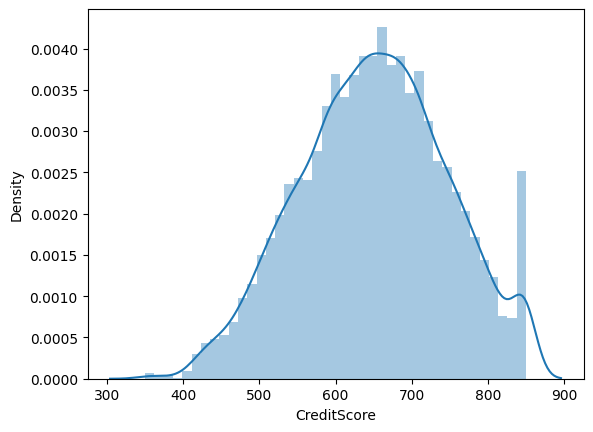

In [233]:
sns.distplot(df4['CreditScore'])

In [240]:
pd.qcut(df4['CreditScore'],10,labels=range(1,11))

0        4
1        4
2        1
3        7
4       10
        ..
9995     9
9996     1
9997     8
9998     9
9999    10
Name: CreditScore, Length: 10000, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [238]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [241]:
df5=df4


In [244]:
df5['CreditScore']=pd.qcut(df4['CreditScore'],10,labels=range(1,11))


ValueError: Bin edges must be unique: array([ 1. ,  1. ,  2. ,  3.7,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [271]:
#pd.qcut(df4['CreditScore'],10,labels=range(1,11))

df5['EstimatedSalary']=pd.qcut(df4['EstimatedSalary'],10,labels=range(1,11))


In [272]:
df5

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,4,42,2,1,1,1,1,6,1,1,0,1,0,0
1,2,15647311,Hill,4,41,1,2,1,0,1,6,0,1,0,0,0,1
2,3,15619304,Onio,1,42,8,4,3,1,0,6,1,1,0,1,0,0
3,4,15701354,Boni,7,39,1,1,2,0,0,5,0,1,0,1,0,0
4,5,15737888,Mitchell,10,43,2,3,1,1,1,4,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,9,39,5,1,2,1,0,5,0,0,1,1,0,0
9996,9997,15569892,Johnstone,1,35,10,1,1,1,1,6,0,0,1,1,0,0
9997,9998,15584532,Liu,8,36,7,1,1,0,1,3,1,1,0,1,0,0
9998,9999,15682355,Sabbatini,9,42,3,2,2,1,0,5,1,0,1,0,1,0




`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<AxesSubplot: xlabel='Balance', ylabel='Density'>

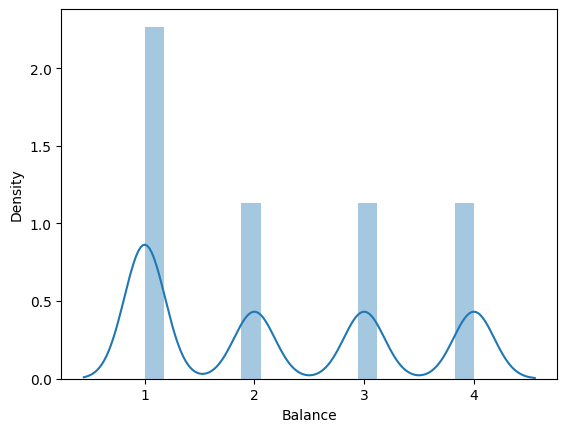

In [268]:
sns.distplot(df5['Balance'])

In [273]:
Y = df5.Exited
X=df5.drop(['Exited','Surname','RowNumber','CustomerId'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

preprocessor=make_column_transformer((MaxAbsScaler(), ['Age','CreditScore','Balance']), remainder='passthrough')

pipe10 = Pipeline([('transformer', preprocessor), ('XGB', XGBClassifier(scale_pos_weight=0.8))])
parameters = { 'XGB__max_depth':[1,2,3,4],
               'XGB__n_estimators':[200,300,400,500]     
               #'RF__class_weight':['balanced', 'balanced_subsample'],
               #'RF__min_samples_split':range(2,10),
               #'RF__min_samples_leaf':range(1,5)
              } # defining parameter space
xgb4_clf = GridSearchCV(pipe10, parameters, cv=4, scoring ='f1')
xgb4_clf.fit(x_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('maxabsscaler',
                                                                         MaxAbsScaler(),
                                                                         ['Age',
                                                                          'CreditScore',
                                                                          'Balance'])])),
                                       ('XGB',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_ca...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'XGB__max_depth': [1, 2, 3, 4],
                         'XGB__n_estimators': [200, 300, 400, 500]},
             scoring='f1')

In [275]:
print('Returned hyperparameter: {}'.format(xgb4_clf.best_params_))
print('Best classification accuracy in train is: {}'.format(xgb4_clf.best_score_))
print('Classification accuracy on test is: {}'.format(f1_score(xgb4_clf.predict(x_test),y_test)))

Returned hyperparameter: {'XGB__max_depth': 2, 'XGB__n_estimators': 400}
Best classification accuracy in train is: 0.5684027247907415
Classification accuracy on test is: 0.5445705024311183


In [277]:
print(confusion_matrix(xgb4_clf.predict(x_test),y_test))
print(classification_report(xgb4_clf.predict(x_test),y_test))

[[1551  236]
 [  45  168]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1787
           1       0.42      0.79      0.54       213

    accuracy                           0.86      2000
   macro avg       0.69      0.83      0.73      2000
weighted avg       0.91      0.86      0.88      2000



In [347]:
print(xgb2_clf.best_estimator_[1].get_params)

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)>


In [357]:
roc_auc_score(y_test2, xgb2_clf.predict(x_test2))

0.7266069357466388

In [ ]:
roc_auc_score(y_test2, xgb2_clf.predict(x_test2))

In [381]:
df3

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,1,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0,1,0,0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0,1,0,0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,1,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,0,1,0


In [382]:
df6=df3

Y=df6.Exited
X=df6.drop(['Exited','Surname','RowNumber','CustomerId','Tenure','CreditScore','HasCrCard','EstimatedSalary','Balance','Geography_France'],axis=1)
X['Age']=np.log(X['Age'])

x_train3,x_test3,y_train3,y_test3=train_test_split(X,Y,test_size=0.2, shuffle=True)


preprocessor=make_column_transformer((MaxAbsScaler(), ['Age']), remainder='passthrough')

pipe6 = Pipeline([('transformer', preprocessor), ('XGB', XGBClassifier(booster='gbtree'))])
parameters2 = {'XGB__max_depth':[1,2,3,4,5],
              'XGB__n_estimators':[100,200,300,400,500],
               #'RF__criterion':['gini','entropy'],
               #'RF__class_weight':['balanced', 'balanced_subsample'],
               #'RF__min_samples_split':range(2,10),
               #'RF__min_samples_leaf':range(1,5)
              } # defining parameter space
xgb4_clf = GridSearchCV(pipe6, parameters2, cv=4, scoring ='f1')
xgb4_clf.fit(x_train3, y_train3)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('maxabsscaler',
                                                                         MaxAbsScaler(),
                                                                         ['Age'])])),
                                       ('XGB',
                                        XGBClassifier(base_score=None,
                                                      booster='gbtree',
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'XGB__max_depth': [1, 2, 3, 4, 5],
                         'XGB__n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1')

In [383]:
print('Returned hyperparameter: {}'.format(xgb4_clf.best_params_))
print('Best classification accuracy in train is: {}'.format(xgb4_clf.best_score_))
print('Classification accuracy on test is: {}'.format(f1_score(xgb4_clf.predict(x_test3),y_test3)))

Returned hyperparameter: {'XGB__max_depth': 2, 'XGB__n_estimators': 100}
Best classification accuracy in train is: 0.5687929591922868
Classification accuracy on test is: 0.5819793205317578


In [384]:
print(confusion_matrix(xgb4_clf.predict(x_test3),y_test3))
print(classification_report(xgb4_clf.predict(x_test3),y_test3))

[[1520  209]
 [  74  197]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1729
           1       0.49      0.73      0.58       271

    accuracy                           0.86      2000
   macro avg       0.72      0.80      0.75      2000
weighted avg       0.89      0.86      0.87      2000



In [386]:
x_sampled2= x_train3.sample(100, random_state=10)
explainer = shap.TreeExplainer(xgb4_clf.best_estimator_[1])
shap_values = explainer.shap_values(x_sampled)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


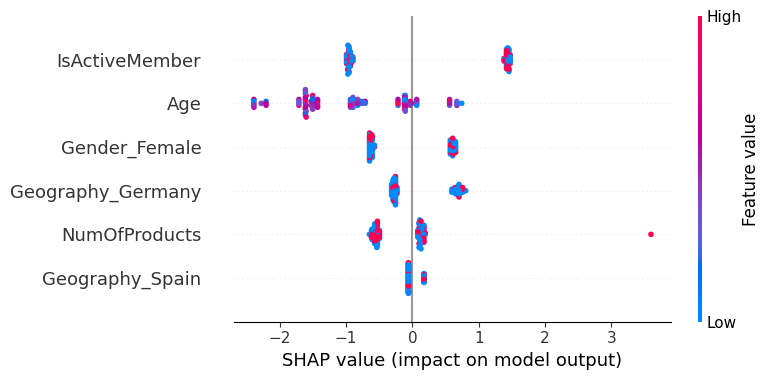

In [387]:
shap.summary_plot(shap_values, x_sampled2)